<a href="https://colab.research.google.com/github/kre-men/Heart_attack_prediction/blob/main/Heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # Heart attack prediction

In [ ]:
import keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
data = pd.read_csv('heart_attack.csv')

In [ ]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,18,15,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,0,30,30,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,0,3,0,0,11,5,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129998 entries, 0 to 129997
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  129998 non-null  int64  
 1   HighBP                129998 non-null  int64  
 2   HighChol              129998 non-null  int64  
 3   CholCheck             129998 non-null  int64  
 4   BMI                   129988 non-null  float64
 5   Smoker                129998 non-null  int64  
 6   Stroke                129998 non-null  int64  
 7   Diabetes              129998 non-null  int64  
 8   PhysActivity          129998 non-null  int64  
 9   HvyAlcoholConsump     129998 non-null  int64  
 10  MentHlth              129998 non-null  int64  
 11  PhysHlth              129998 non-null  int64  
 12  Sex                   129998 non-null  int64  
 13  Age                   129998 non-null  int64  
 14  Education             129998 non-null  int64  
 15  

In [ ]:
data.isnull().sum()

HeartDiseaseorAttack     0
HighBP                   0
HighChol                 0
CholCheck                0
BMI                     10
Smoker                   0
Stroke                   0
Diabetes                 0
PhysActivity             0
HvyAlcoholConsump        0
MentHlth                 0
PhysHlth                 0
Sex                      0
Age                      0
Education                0
Income                   0
dtype: int64

In [ ]:
data.isna().sum()

HeartDiseaseorAttack     0
HighBP                   0
HighChol                 0
CholCheck                0
BMI                     10
Smoker                   0
Stroke                   0
Diabetes                 0
PhysActivity             0
HvyAlcoholConsump        0
MentHlth                 0
PhysHlth                 0
Sex                      0
Age                      0
Education                0
Income                   0
dtype: int64

In [ ]:
data.duplicated().sum()

22961

In [ ]:
data.describe(include=['number', 'object']).T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,107027.0,0.110794,0.313879,0.0,0.0,0.0,0.0,1.0
HighBP,107027.0,0.470564,0.499135,0.0,0.0,0.0,1.0,1.0
HighChol,107027.0,0.453428,0.497829,0.0,0.0,0.0,1.0,1.0
CholCheck,107027.0,0.957525,0.201672,0.0,1.0,1.0,1.0,1.0
BMI,107027.0,28.969737,7.410266,12.0,24.0,28.0,32.0,98.0
Smoker,107027.0,0.483102,0.499717,0.0,0.0,0.0,1.0,1.0
Stroke,107027.0,0.050071,0.218093,0.0,0.0,0.0,0.0,1.0
Diabetes,107027.0,0.351893,0.746584,0.0,0.0,0.0,0.0,2.0
PhysActivity,107027.0,0.718650,0.449660,0.0,0.0,1.0,1.0,1.0
HvyAlcoholConsump,107027.0,0.066497,0.249150,0.0,0.0,0.0,0.0,1.0


In [ ]:
result_list = []
for column in data.columns:
    unique_category_names = data[column].unique()
    column_data_type = data[column].dtype  # Added line to get the data type of the column
    result_list.append({
        'Column': column,
        'Data Type': column_data_type,  # Added 'Data Type' field
        'Category Names': unique_category_names.tolist()
    })
unique_categories_data = pd.DataFrame(result_list)
unique_categories_data

,Column,Data Type,Category Names
0,HeartDiseaseorAttack,int64,"[0, 1]"
1,HighBP,int64,"[1, 0]"
2,HighChol,int64,"[1, 0]"
3,CholCheck,int64,"[1, 0]"
4,BMI,float64,"[40.0, 25.0, 28.0, 27.0, 24.0, 30.0, 34.0, 26.0, 33.0, 21.0, 23.0, 22.0, 38.0, 32.0, 37.0, 31.0, 29.0, 20.0, 35.0, 45.0, 39.0, 19.0, 47.0, 18.0, 36.0, 43.0, 55.0, 49.0, 42.0, 17.0, 16.0, 41.0, 44.0, 50.0, 59.0, 48.0, 52.0, 46.0, 54.0, 57.0, 53.0, 14.0, 15.0, 51.0, 58.0, 63.0, 61.0, 56.0, 74.0, 62.0, 64.0, 66.0, 73.0, 85.0, 60.0, 67.0, 65.0, 70.0, 82.0, 79.0, 92.0, 68.0, 72.0, 88.0, 96.0, 13.0, 81.0, 71.0, 75.0, 12.0, 77.0, 69.0, 76.0, 87.0, 89.0, 84.0, 95.0, 98.0, 91.0, 86.0, 83.0]"
5,Smoker,int64,"[1, 0]"
6,Stroke,int64,"[0, 1]"
7,Diabetes,int64,"[0, 2, 1]"
8,PhysActivity,int64,"[0, 1]"
9,HvyAlcoholConsump,int64,"[0, 1]"


In [ ]:
for column in data.columns:
    print(f"\nFrequency of categories in '{column}':")
    print(data[column].value_counts())


Frequency of categories in 'HeartDiseaseorAttack':
HeartDiseaseorAttack
0    117842
1     12156
Name: count, dtype: int64

Frequency of categories in 'HighBP':
HighBP
0    74149
1    55849
Name: count, dtype: int64

Frequency of categories in 'HighChol':
HighChol
0    74577
1    55421
Name: count, dtype: int64

Frequency of categories in 'CholCheck':
CholCheck
1    125229
0      4769
Name: count, dtype: int64

Frequency of categories in 'BMI':
BMI
27.0    12544
26.0    10439
24.0    10087
25.0     8760
28.0     8378
        ...  
88.0        1
85.0        1
91.0        1
86.0        1
83.0        1
Name: count, Length: 81, dtype: int64

Frequency of categories in 'Smoker':
Smoker
0    71755
1    58243
Name: count, dtype: int64

Frequency of categories in 'Stroke':
Stroke
0    124622
1      5376
Name: count, dtype: int64

Frequency of categories in 'Diabetes':
Diabetes
0    109498
2     18069
1      2431
Name: count, dtype: int64

Frequency of categories in 'PhysActivity':
PhysActivity

In [ ]:
data['BMI'].value_counts()

BMI
27.0    9568
26.0    7869
24.0    7412
28.0    6724
25.0    6637
        ... 
88.0       1
85.0       1
91.0       1
86.0       1
83.0       1
Name: count, Length: 81, dtype: int64

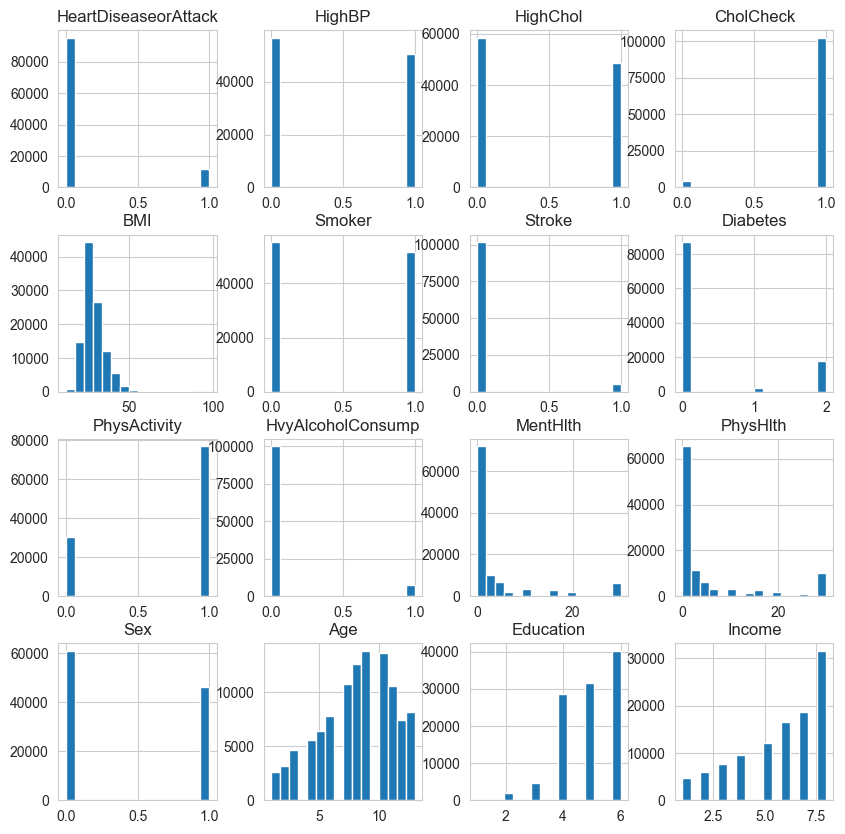

In [ ]:
data[data.columns].hist(bins=16, figsize=(10,10))
plt.savefig('histogram_plots')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# 1. Predict the heart attack ('HeartDiseaseorAttack')

In [ ]:
drop_columns = ['HeartDiseaseorAttack']
X = data.drop(drop_columns, axis=1)
y = data['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
##############################################
#                LogisticRegression

In [ ]:
log_reg = LogisticRegression(random_state=0) #Accuracy: 0.8918527515649818
# log_reg = LogisticRegression(C=0.001, random_state=0) #Accuracy: 0.8920863309352518
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_ac = accuracy_score(y_test, log_reg_pred)

In [ ]:
print("Logistic Regression Accuracy:", log_reg_ac)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred, zero_division=1))

Logistic Regression Accuracy: 0.8918527515649818

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19069
           1       0.53      0.09      0.16      2337

    accuracy                           0.89     21406
   macro avg       0.71      0.54      0.55     21406
weighted avg       0.86      0.89      0.86     21406


In [ ]:
# Version 2

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"\nBest Parameters: {best_params}")


Best Parameters: {'C': 0.001}


In [ ]:
log_reg = LogisticRegression(C=0.001, random_state=0) #Accuracy: 0.8920863309352518
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_ac = accuracy_score(y_test, log_reg_pred)

In [ ]:
print("Logistic Regression Accuracy:", log_reg_ac)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred, zero_division=1))

Logistic Regression Accuracy: 0.8920863309352518

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19069
           1       0.54      0.08      0.13      2337

    accuracy                           0.89     21406
   macro avg       0.72      0.53      0.54     21406
weighted avg       0.86      0.89      0.85     21406


In [ ]:
# Version 3

In [ ]:
drop_columns = ['HeartDiseaseorAttack', 'Education', 'Smoker', 'MentHlth']
X = data.drop(drop_columns, axis=1)
y = data['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression( C=0.001, random_state=0)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_ac = accuracy_score(y_test, log_reg_pred)

In [ ]:
print("Logistic Regression Accuracy:", log_reg_ac)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred, zero_division=1))

Logistic Regression Accuracy: 0.8921330468093058

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19069
           1       0.55      0.07      0.12      2337

    accuracy                           0.89     21406
   macro avg       0.72      0.53      0.53     21406
weighted avg       0.86      0.89      0.85     21406


In [ ]:
# Version 4

In [ ]:
drop_columns = ['HeartDiseaseorAttack', 'Education', 'Smoker', 'MentHlth']
X = data.drop(drop_columns, axis=1)
y = data['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(solver='lbfgs', penalty=None, random_state=0) #  C=0.001, # l2 = Accuracy: 0.8926002055498459
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_ac = accuracy_score(y_test, log_reg_pred)

In [ ]:
print("Logistic Regression Accuracy:", log_reg_ac)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred, zero_division=1))

Logistic Regression Accuracy: 0.8926002055498459

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19069
           1       0.55      0.09      0.16      2337

    accuracy                           0.89     21406
   macro avg       0.72      0.54      0.55     21406
weighted avg       0.86      0.89      0.86     21406


In [ ]:
# Version 5

In [ ]:
drop_columns = ['HeartDiseaseorAttack', 'Education', 'Smoker', 'MentHlth']
X = data.drop(drop_columns, axis=1)
y = data['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(solver='sag', penalty=None, random_state=0) #Logistic Regression Accuracy: 0.8926469214238998
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_ac = accuracy_score(y_test, log_reg_pred)

In [ ]:
print("Logistic Regression Accuracy:", log_reg_ac)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred, zero_division=1))

Logistic Regression Accuracy: 0.8926469214238998

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19069
           1       0.55      0.09      0.16      2337

    accuracy                           0.89     21406
   macro avg       0.72      0.54      0.55     21406
weighted avg       0.86      0.89      0.86     21406


In [ ]:
# Version 6

In [ ]:
drop_columns = ['HeartDiseaseorAttack']
# 'HighBP', 'HighChol', 'CholCheck','Stroke','Diabetes','Age', 'MentHlth', , 'PhysHlth', 'PhysActivity', 'HvyAlcoholConsump', 'BMI', 'Smoker', 'Sex', 'Education', 'Income'
X = data.drop(drop_columns, axis=1)
y = data['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(class_weight={0: 0.2, 1: 0.8},random_state=0)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_ac = accuracy_score(y_test, log_reg_pred)

In [ ]:
print("Logistic Regression Accuracy:", log_reg_ac)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred, zero_division=1))

Logistic Regression Accuracy: 0.828365878725591

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     19069
           1       0.32      0.52      0.40      2337

    accuracy                           0.83     21406
   macro avg       0.63      0.69      0.65     21406
weighted avg       0.87      0.83      0.85     21406


In [ ]:
###############################################
#              RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_ac = accuracy_score(y_test, rf_pred)

In [ ]:
print("Random Forest Accuracy:", rf_ac)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=1))

Random Forest Accuracy: 0.8756890591422966

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     19069
           1       0.30      0.10      0.15      2337

    accuracy                           0.88     21406
   macro avg       0.60      0.54      0.54     21406
weighted avg       0.83      0.88      0.85     21406


In [ ]:
################################################
#                   XGBoost

In [ ]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_ac = accuracy_score(y_test, xgb_pred)

In [ ]:
print("XGBoost Accuracy:", xgb_ac)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred, zero_division=1))

XGBoost Accuracy: 0.8903111277211997

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19069
           1       0.49      0.09      0.16      2337

    accuracy                           0.89     21406
   macro avg       0.69      0.54      0.55     21406
weighted avg       0.85      0.89      0.86     21406


In [ ]:
#############################################
#              MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)
mlp_ac = accuracy_score(y_test, mlp_pred)

In [ ]:
print("MLPClassifier Accuracy:", mlp_ac)
print("\nMLPClassifier Report:")
print(classification_report(y_test, mlp_pred, zero_division=1))

MLPClassifier Accuracy: 0.8896103896103896

MLPClassifier Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19069
           1       0.47      0.10      0.16      2337

    accuracy                           0.89     21406
   macro avg       0.69      0.54      0.55     21406
weighted avg       0.85      0.89      0.86     21406


In [ ]:
###############################################
#                   SVC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
data = pd.read_csv('heart_attack.csv')

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data_sample = data.sample(frac=0.1)

In [ ]:
drop_columns = ['HeartDiseaseorAttack']#, 'Education', 'Smoker', 'MentHlth']
X_sample = data_sample.drop(drop_columns, axis=1)
y_sample = data_sample['HeartDiseaseorAttack']

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sample)
X_test_scaled = scaler.transform(X_test_sample)

In [ ]:
svc = SVC(kernel='rbf', random_state=0)
svc.fit(X_train_scaled, y_train_sample)
svc_pred = svc.predict(X_test_scaled)
svc_ac = accuracy_score(y_test_sample, svc_pred)

In [ ]:
# (kernel='rbf')#default
print("SVM Accuracy:", svc_ac)
print("\nSVM Classification Report:")
print(classification_report(y_test_sample, svc_pred, zero_division=1))

SVM Accuracy: 0.8902382064455862

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1905
           1       0.52      0.06      0.11       236

    accuracy                           0.89      2141
   macro avg       0.71      0.53      0.52      2141
weighted avg       0.85      0.89      0.85      2141


In [ ]:
models = ['LogisticRegression','Random Forest', 'XGBoost', 'MLPClassifier', 'SVM']
accuracy_values = [log_reg_ac, rf_ac, xgb_ac, mlp_ac, svc_ac]
compare_models = pd.DataFrame({ 'Algorithms': models, 'Accuracy Score': accuracy_values })
compare_models.sort_values(by = 'Accuracy Score', ascending = False)

,Algorithms,Accuracy Score
0,LogisticRegression,0.891853
2,XGBoost,0.890311
4,SVM,0.890238
3,MLPClassifier,0.889610
1,Random Forest,0.875689


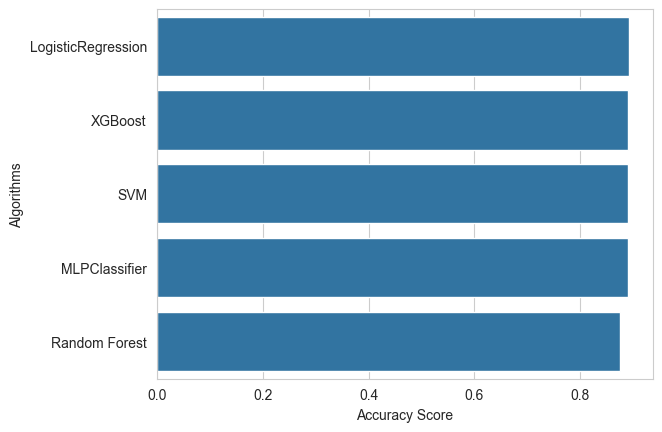

In [ ]:
# plt.figure(figsize=(8,8))
TestsScore=accuracy_values
sns.barplot(x = 'Accuracy Score', y = 'Algorithms', data = compare_models.sort_values(by = 'Accuracy Score', ascending = False))
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
log_reg_metrics = precision_recall_fscore_support(y_test, log_reg_pred, average=None)
rf_metrics = precision_recall_fscore_support(y_test, rf_pred, average=None)
svm_metrics = precision_recall_fscore_support(y_test_sample, svc_pred, average=None)
xgb_metrics = precision_recall_fscore_support(y_test, xgb_pred, average=None)
mlp_metrics = precision_recall_fscore_support(y_test, mlp_pred, average=None)

accuracy_values = [log_reg_ac, rf_ac, xgb_ac, mlp_ac, svc_ac]
metrics_data = {
    'Metric': ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-Score (Class 0)', 'F1-Score (Class 1)'],
    'LogRegr': [log_reg_ac, *log_reg_metrics[0], *log_reg_metrics[1], *log_reg_metrics[2]],
    'Rand_Forest': [rf_ac, *rf_metrics[0], *rf_metrics[1], *rf_metrics[2]],
    'XGBoost': [xgb_ac, *xgb_metrics[0], *xgb_metrics[1], *xgb_metrics[2]],
    'MLP': [mlp_ac, *mlp_metrics[0], *mlp_metrics[1], *mlp_metrics[2]],
    'SVM': [svc_ac, *svm_metrics[0], *svm_metrics[1], *svm_metrics[2]]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Metric', inplace=True)
print(metrics_df)

                      LogRegr  Rand_Forest   XGBoost       MLP       SVM
Metric                                                                  
Accuracy             0.891853     0.875689  0.890311  0.889610  0.890238
Precision (Class 0)  0.899209     0.897982  0.898822  0.899207  0.894986
Precision (Class 1)  0.526066     0.295455  0.487585  0.473029  0.518519
Recall (Class 0)     0.989512     0.970738  0.988096  0.986680  0.993176
Recall (Class 1)     0.094994     0.100128  0.092426  0.097561  0.059322
F1-Score (Class 0)   0.942202     0.932944  0.941347  0.940915  0.941528
F1-Score (Class 1)   0.160928     0.149569  0.155396  0.161759  0.106464
